In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import odps 
from odps.inter import setup
from odps.inter import enter, teardown
from odps import options
import odps 


o = odps.ODPS('secret information')

In [11]:
import geopandas as gpd 
import h3pandas
from pyproj import CRS
import folium
from tqdm import tqdm 
wgs84 = CRS('EPSG:4326')

In [12]:
df_pudo = o.get_table('table name').to_df().to_pandas()

In [13]:
df_dist = o.get_table('table name').to_df().to_pandas()

In [14]:
df_addr = o.get_table('table name').to_df().to_pandas()

In [ ]:
df_pudo.head()

In [ ]:
df_dist.head()

In [ ]:
df_addr.head()

# __Creating Hexagones__

## hexagones from pudo and orders

In [18]:
df1 = df_pudo.rename(columns={'lon': 'lng'})

In [19]:
df1 = df1[lambda x: x.region_name_ru == 'Республика Татарстан']

In [20]:
df1 = df1[lambda x: x.pay_month >= '2023-02-28 16:00:00']

In [21]:
df1['orders'].sum()

1040480

In [22]:
df1 = df1.drop(['pay_month'], axis = 1)

In [23]:
df1 = df1.loc[lambda df1: (df1.lat != '') & (df1.lng != '') &
                               (~df1.lat.isna()) & (~df1.lng.isna())]

In [24]:
dfh3 = df1.h3.geo_to_h3(8)

In [25]:
dfh3.reset_index(inplace = True)

In [26]:
dfh3_grouped = dfh3.groupby(['h3_08'], as_index=False).agg({'pickup_station_id' : 'count'})

In [ ]:
dfh3_grouped

## hexagones with population

In [28]:
df3 = df_addr.rename(columns={'longitude': 'lng', 'latitude' : 'lat'})

In [29]:
df3 = df3.loc[lambda df3: (df3.lat != '') & (df3.lng != '') &
                               (~df3.lat.isna()) & (~df3.lng.isna())]

In [30]:
dfh3_3 = df3.h3.geo_to_h3(8)

In [31]:
dfh3_3.reset_index(inplace = True)

In [32]:
dfh3_3_grouped = dfh3_3.groupby(['h3_08'], as_index=False).agg({'id' : 'count'})

In [ ]:
dfh3_3_grouped

## dataset for addresses and orders

In [34]:
df2 = df_dist.drop(['lat', 'lon'], axis = 1)

In [35]:
df2 = df2.rename(columns={'longitude': 'lng', 'latitude' : 'lat', 'rnk' : 'orders'})

In [36]:
df2 = df2[lambda x: x.region_name_ru == 'Республика Татарстан']

In [37]:
df2['pay_month'] = pd.to_datetime(df2['pay_monthh'])

In [38]:
df2= df2[lambda x: x.pay_month >= '2023-03-01']

In [39]:
df2 = df2.drop(['pay_month', 'pay_monthh', 'shipping_model' ], axis = 1)

In [40]:
df2 = df2.loc[lambda df1: (df2.lat != '') & (df2.lng != '') &
                               (~df2.lat.isna()) & (~df2.lng.isna())]

In [ ]:
df2.head()

## selection of the optimal distance 

In [42]:
#3 sigma selection if df2 is original
import numpy as np


# generate some sample data
data = df2['dist']

# calculate the mean and standard deviation of the data
mean = np.mean(data)
std = np.std(data)

# identify the outliers using a 3-sigma selection
lower_bound = mean - 3*std
upper_bound = mean + 3*std
outliers = [x for x in data if x < lower_bound or x > upper_bound]

print(f"Mean: {mean:.2f}, Standard Deviation: {std:.2f}")
print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
print(f"Number of Outliers: {len(outliers)}")


Mean: 83736.90, Standard Deviation: 514172.81
Lower Bound: -1458781.51, Upper Bound: 1626255.32
Number of Outliers: 853


In [ ]:
import seaborn as sns
# Create density plot
sns.kdeplot(data=df2, x="dist", )


plt.xlabel("distance")
plt.ylabel("Density")
plt.title("Distribution of distance to pudo points")

# Show plot
plt.show()

In [44]:
df2 = df2[lambda x : x.dist <= 25000]

In [45]:
#3 sigma selection if df2 is  <= 25000



# generate some sample data
data = df2['dist']

# calculate the mean and standard deviation of the data
mean = np.mean(data)
std = np.std(data)

# identify the outliers using a 3-sigma selection
lower_bound = mean - 3*std
upper_bound = mean + 3*std
outliers = [x for x in data if x < lower_bound or x > upper_bound]

print(f"Mean: {mean:.2f}, Standard Deviation: {std:.2f}")
print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
print(f"Number of Outliers: {len(outliers)}")


Mean: 1807.47, Standard Deviation: 3262.65
Lower Bound: -7980.48, Upper Bound: 11595.42
Number of Outliers: 1521


In [ ]:

# Create density plot
sns.kdeplot(data=df2, x="dist", )


plt.xlabel("distance")
plt.ylabel("Density")
plt.title("Distribution of distance to pudo points")

# Show plot
plt.show()

In [47]:
df2 = df2[lambda x : x.dist <= 10000]

In [48]:
#3 sigma selection if df2 is  <= 10000



# generate some sample data
data = df2['dist']

# calculate the mean and standard deviation of the data
mean = np.mean(data)
std = np.std(data)

# identify the outliers using a 3-sigma selection
lower_bound = mean - 3*std
upper_bound = mean + 3*std
outliers = [x for x in data if x < lower_bound or x > upper_bound]

print(f"Mean: {mean:.2f}, Standard Deviation: {std:.2f}")
print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
print(f"Number of Outliers: {len(outliers)}")


Mean: 1265.95, Standard Deviation: 1696.05
Lower Bound: -3822.19, Upper Bound: 6354.10
Number of Outliers: 1626


In [ ]:

# Create density plot
sns.kdeplot(data=df2, x="dist", )


plt.xlabel("distance")
plt.ylabel("Density")
plt.title("Distribution of distance to pudo points")

# Show plot
plt.show()

In [50]:
df2 = df2[lambda x : x.dist <= 1000]

In [51]:
#3 sigma selection if df2 is  <= 10000



# generate some sample data
data = df2['dist']

# calculate the mean and standard deviation of the data
mean = np.mean(data)
std = np.std(data)

# identify the outliers using a 3-sigma selection
lower_bound = mean - 3*std
upper_bound = mean + 3*std
outliers = [x for x in data if x < lower_bound or x > upper_bound]

print(f"Mean: {mean:.2f}, Standard Deviation: {std:.2f}")
print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
print(f"Number of Outliers: {len(outliers)}")


Mean: 454.53, Standard Deviation: 263.26
Lower Bound: -335.26, Upper Bound: 1244.31
Number of Outliers: 0


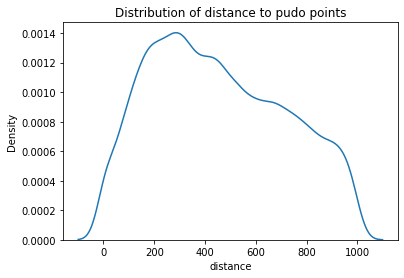

In [52]:
# Create density plot
sns.kdeplot(data=df2, x="dist", )


plt.xlabel("distance")
plt.ylabel("Density")
plt.title("Distribution of distance to pudo points")

# Show plot
plt.show()

## hexagones of addresses and orders

In [53]:
dfh3_2 = df2.h3.geo_to_h3(8)

In [54]:
dfh3_2.reset_index(inplace = True)

In [55]:
dfh3_2 = dfh3_2[lambda x : x.dist <= 1000]

In [56]:
dfh3_2_grouped = dfh3_2.groupby(['h3_08'], as_index=False).agg({'dist' : 'median', 'orders' : 'count'})

In [57]:
dfh3_2_grouped['dist'].mean()

528.0634013200116

In [ ]:
dfh3_2_grouped.sort_values('dist')

## join dataframes

In [59]:
df_test = pd.merge(dfh3_grouped , dfh3_3_grouped, on = 'h3_08', how = 'outer')

In [ ]:
df_test = df_test.dropna(subset = ['id'] )
df_test

In [61]:
df_test['pickup_station_id'] = df_test['pickup_station_id'].fillna(0)

In [ ]:
df_test2 = pd.merge(df_test , dfh3_2_grouped, on = 'h3_08', how = 'outer')
df_test2

In [ ]:
df_test2['pickup_station_id'] = df_test2['pickup_station_id'].fillna(0)
df_test2['id'] = df_test2['id'].fillna(0)
df_test2

In [ ]:
df_test2 = df_test2.dropna(subset = ['dist'])
df_test2

In [65]:
df_test2.loc[:, 'm/n'] = df_test2['orders']/df_test2['id']

df_test2

df_test2_1 = df_test2.replace([np.inf, -np.inf], np.nan)
df_test2_1 = df_test2_1.dropna()

<ipython-input-65-d90efe1512dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test2.loc[:, 'm/n'] = df_test2['orders']/df_test2['id']


In [ ]:
df_test2_1 = df_test2_1.drop(df_test2_1[df_test2_1['m/n'] == 1].index)
df_test2_1

In [67]:
df = df_test2_1

In [ ]:
df['home_addr'] = df['id']
df

## Create map with hexagones coloring them in dependance on distance

In [ ]:
dfh3_dist_grouped = df.groupby(['h3_08', 'dist', 'm/n'], as_index=False).agg({'orders' : 'sum', 'home_addr' : 'sum'})
dfh3_dist_grouped.set_index('h3_08', inplace=True)
dfh3_dist_boundary = dfh3_dist_grouped.h3.h3_to_geo_boundary()
dfh3_dist_boundary.set_crs(wgs84, inplace=True)

In [ ]:
import branca.colormap as cm
#colour hexagons in Kazan according to the mean distance, where green - min and red - max
linear1 = cm.LinearColormap(["green", "yellow", "red"], vmin=dfh3_dist_boundary['dist'].min(),
                           vmax=dfh3_dist_boundary['dist'].max())

linear1

In [ ]:
linear = cm.LinearColormap(["red", "yellow","green"], vmin=dfh3_dist_boundary['orders'].min(),
                           vmax=dfh3_dist_boundary['orders'].max())

linear

In [ ]:
linear2 = cm.LinearColormap(["green", "yellow", "red"], vmin=dfh3_dist_boundary['home_addr'].min(),
                           vmax=dfh3_dist_boundary['home_addr'].max())

linear2

In [108]:
m = folium.Map(zoom_start=10, tiles="cartodbpositron")

geo_hex_dist = folium.GeoJson(data=dfh3_dist_boundary,
                         name = "distance",
                       style_function=lambda x: {"fillColor": linear1(x["properties"]["dist"]),}, 
                       tooltip = folium.GeoJsonTooltip(fields=['dist', 'orders', 'm/n'], 
                                               aliases=['dist', 'orders', 'm/n']
                                              ), 
                       highlight_function = lambda x: {"fillOpacity": 0.8},
                      )

geo_hex_orders = folium.GeoJson(data=dfh3_dist_boundary,
                         name = "orders_density",
                       style_function=lambda x: {"fillColor": linear(x["properties"]["orders"]),}, 
                       tooltip = folium.GeoJsonTooltip(fields=['orders', 'dist'], 
                                               aliases=['orders', 'dist']
                                              ), 
                       highlight_function = lambda x: {"fillOpacity": 0.8},
                      )

geo_hex_addr = folium.GeoJson(data=dfh3_dist_boundary,
                         name = "home addresses",
                       style_function=lambda x: {"fillColor": linear2(x["properties"]["home_addr"]),}, 
                       tooltip = folium.GeoJsonTooltip(fields=['home_addr', 'orders'], 
                                               aliases=['home_addr', 'orders']
                                              ), 
                       highlight_function = lambda x: {"fillOpacity": 0.8},
                      )

geo_hex_dist.add_to(m)
geo_hex_orders.add_to(m)
geo_hex_addr.add_to(m)




## Create map with pudo-points

In [109]:
df1_pudo = df_pudo.rename(columns={'lon': 'lng'})
df1_pudo = df1_pudo[lambda x: x.region_name_ru == 'Республика Татарстан']

In [ ]:
df1_pudo = df1_pudo.drop(['pay_month'], axis = 1)
df1_pudo.head()

In [ ]:
pointsdf = gpd.GeoDataFrame(df1_pudo, geometry=gpd.points_from_xy(df1_pudo.lng, df1_pudo.lat))
pointsdf.set_crs(4326, inplace=True)

In [ ]:
test_pudo = df1_pudo.groupby(['partner_name', 'pickup_station_id']).agg({'orders' : 'sum'}  )
test_pudo

In [113]:
def my_color_function(x):
    """Maps partner names to different colors."""
    partner_name = x['properties']['partner_name']
    if partner_name == 'CDEK':
        return "purple"
    if partner_name == 'CAINIAO':
        return "green"
    if partner_name == 'KAZAN_EXPRESS':
        return "lightblue"
    if partner_name == 'IML':
        return "red"
    if partner_name == 'RUPOST':
        return "blue"
    if partner_name == 'SVYAZNOY':
        return "yellow"
    if partner_name == 'X5':
        return "orange"


folium.GeoJson(pointsdf, 
                name = "pudo_points",
               marker=folium.CircleMarker(radius=4, fill_color="orange", fill_opacity=0.8, color="black", weight=1),
               style_function = lambda x: { "fillColor":  my_color_function(x)}, 
               tooltip = folium.GeoJsonTooltip(fields=['partner_name', 'pickup_station_id', 'orders'], 
                                               aliases=['partner_name', 'pickup_station_id', 'orders']
                                              ),
               
              ).add_to(m)


In [114]:
folium.LayerControl().add_to(m)
m.save('interactive_map.html')

# __LINEAR REGRESSION__

In [78]:
!pip install spicy

Defaulting to user installation because normal site-packages is not writeable


In [79]:
import spicy
from scipy.stats import linregress

In [80]:
slope, intercept, r_value, p_value, std_err = linregress(df['dist'], df['pickup_station_id'])
print("Slope: ", slope)
print("Intercept: ", intercept)
print("R-squared: ", r_value**2)
print("p", p_value)
print("error" , std_err)

Slope:  -0.025975079156727574
Intercept:  25.777750654848838
R-squared:  0.11597902990831004
p 2.9790448327233805e-27
error 0.002327905364672977


In [86]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 9.8 MB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 150.9 MB/s eta 0:00:01


In [115]:
import sklearn
from sklearn.linear_model import LinearRegression

In [148]:
x = df['dist'].values.reshape(-1, 1)
y = df['m/n'].values

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


# Create a LinearRegression object and fit the training data:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)


#Predict the values using the testing set:
y_pred = lin_reg.predict(x_test)


# Evaluate the performance of the model:
from sklearn.metrics import r2_score, mean_squared_error
print('R-squared:', r2_score(y_test, y_pred))
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Coefficients: ', lin_reg.coef_)
print('Intercept: ', lin_reg.intercept_)
print('Mean absolute error: ', mean_absolute_error(y_pred, y_pred))

R-squared: 0.030158819103462853
Mean squared error:  0.0831097111667861
Root Mean Squared Error: 0.28828754944809204
Coefficients:  [-0.00019603]
Intercept:  0.516567720956219
Mean absolute error:  0.0


[-2.14674313e-04  5.34043590e-01]


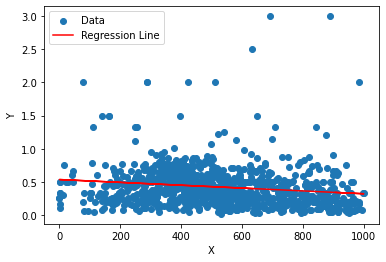

In [149]:
x = np.array(df['dist'])
y = np.array(df['m/n'])

coeffs = np.polyfit(x, y, 1)
print(coeffs)

# create a function to calculate the predicted values of y based on the regression line
regression_line = np.poly1d(coeffs)
y_pred = regression_line(x)

# plot the scatter plot of the data and the regression line
plt.scatter(x, y, label='Data')
plt.plot(x, y_pred, color='red', label='Regression Line')

# add labels and legend to the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# show the plot
plt.show()

## example of using

In [156]:
#example of using hexagone
x_test1 = np.array([700]).reshape((-1, 1))
y_pred1 = lin_reg.predict(x_test1)
print(y_pred1)

x_test2 =np.array([200]).reshape((-1, 1))
y_pred2 = lin_reg.predict(x_test2)
print(y_pred2)

print('Mean number of orders in chosen hexagon will increase by:', float(y_pred2) - float(y_pred1), 'if the distance decrease from 698 to 200 metres')

[0.37934998]
[0.47736265]
Mean number of orders in chosen hexagon will increase by: 0.09801267049519818 if the distance decrease from 698 to 200 metres
